In [2]:
# keras imports for the dataset and building our neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from keras.applications import ResNet50

In [3]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import datetime

In [4]:
%%time 
import _pickle, gzip, urllib.request, json
import numpy as np


with gzip.open('soundee-255.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = _pickle.load(f, encoding='latin1')
print(train_set[0].shape)

(2758, 225, 225, 3)
CPU times: user 4.05 s, sys: 534 ms, total: 4.59 s
Wall time: 4.6 s


In [7]:
shape = (225, 225, 3)

This is a drop


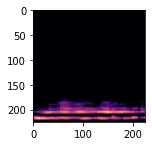

This is a drop


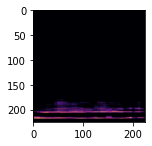

This is a drop


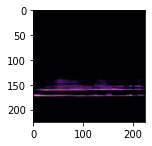

This is a drop


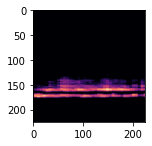

This is a drop


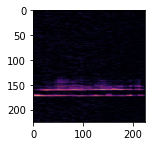

This is a drop


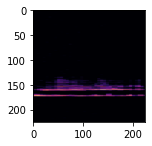

This is a drop


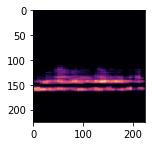

This is a drop


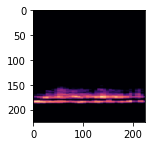

This is a drop


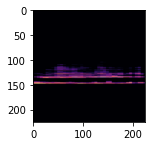

This is a drop


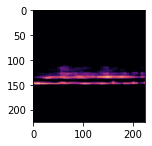

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (2,10)

for i in range(0, 10):
    img = train_set[0][i]
    label = train_set[1][i]
    img_reshape = img.reshape(shape)
    imgplot = plt.imshow(img_reshape)
    print('This is a {}'.format(label))
    plt.show()

In [9]:
(train_images, train_labels), (valid_images, valid_labels), (test_images, test_labels) = train_set, valid_set, test_set

In [10]:
print("train_images shape", train_images.shape)
print("train_labels shape", train_labels.shape)

train_images shape (2758, 225, 225, 3)
train_labels shape (2758,)


In [12]:
train_images = train_images.reshape(train_images.shape[0], 225, 225, 3)
valid_images = valid_images.reshape(valid_images.shape[0], 225, 225, 3)
test_images = test_images.reshape(test_images.shape[0], 225, 225, 3)

train_images = train_images.astype('float32')
valid_images = valid_images.astype('float32')
test_images = test_images.astype('float32')

In [13]:
# normalizing the data to help with the training
train_images /= 255
valid_images /= 255
test_images /= 255

In [14]:
from sklearn.preprocessing import LabelEncoder

def encoding_to_int(labels):
    e = LabelEncoder()
    e.fit(labels)
    return e.transform(labels)

In [15]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 3
print("Shape before one-hot encoding: ", train_labels.shape)
train_labels = np_utils.to_categorical(encoding_to_int(train_labels), n_classes)
valid_labels = np_utils.to_categorical(encoding_to_int(valid_labels), n_classes)
test_labels = np_utils.to_categorical(encoding_to_int(test_labels), n_classes)
print("Shape after one-hot encoding: ", train_labels.shape)

Shape before one-hot encoding:  (2758,)
Shape after one-hot encoding:  (2758, 3)


In [16]:
model = ResNet50(include_top=True, weights=None, input_shape=shape, pooling=max, classes=3)

In [17]:
# compiling the ResNet50 model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [18]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
save = tf.keras.callbacks.ModelCheckpoint('best_model_255.h5', monitor='val_loss', mode='min', save_best_only=True)
callback = [es, save]

In [19]:
# training the model for 10 epochs
hist = model.fit(train_images, train_labels, batch_size=64, epochs=100, validation_data=(valid_images, valid_labels), callbacks=callback)

Epoch 1/100
16/44 [=========>....................] - ETA: 5:16 - loss: 2.1630 - accuracy: 0.5156

KeyboardInterrupt: 

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

In [ ]:
prediction = model.predict(test_images)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [ ]:
test_label = test_set[1]

In [ ]:
np.argmax(prediction[407])

In [ ]:
test_labels[407]

In [ ]:
for index, label in enumerate(test_label):
    print(index, label)

In [ ]:
cnt = 0
for i in prediction:
    pre_ans = i.argmax()
    pre_ans_str = ''
    print(i)
    if pre_ans == 0: pre_ans_str = "drop"
    elif pre_ans == 1: pre_ans_str = "motor"
    elif pre_ans == 2: pre_ans_str = "water"
    

    if i[0] >= 0.4 : print(f"{test_label[cnt]} 이미지는 {pre_ans_str}로 추정됩니다.")
    if i[1] >= 0.4: print(f"{test_label[cnt]} 이미지는 {pre_ans_str}로 추정됩니다.")
    if i[2] >= 0.4: print(f"{test_label[cnt]} 이미지는 {pre_ans_str}로 추정됩니다.")
    if i[0] < 0.4 and i[1] < 0.4 and i[2] < 0.4 : print(f"{test_label[cnt]} 이미지를 추정할 수 없습니다.")
    print()
    cnt += 1